# Visualization with Pandas (and Matplotlib)

In [ ]:
# read in data
# drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
path = 
url = '../data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [5]:
# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [7]:
# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

## Histogram: show the distribution of a numerical variable

In [8]:
# sort the beer column and mentally split it into 3 groups
# drinks.beer.order().values
drinks.beer.sort_values()

0        0
40       0
79       0
90       0
97       0
103      0
106      0
111      0
128      0
147      0
13       0
149      0
107      0
158      0
46       0
137      1
38       1
171      1
73       1
168      2
123      3
119      5
116      5
167      5
104      5
78       5
53       6
190      6
86       6
178      6
      ... 
76     233
75     234
99     236
109    238
32     240
3      245
23     245
141    247
184    249
120    251
8      261
60     263
17     263
156    270
9      279
93     281
151    283
160    284
130    285
16     295
140    297
129    306
81     313
188    333
98     343
135    343
65     346
62     347
45     361
117    376
Name: beer, Length: 193, dtype: int64

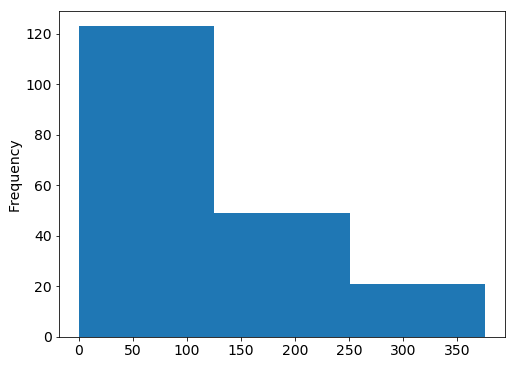

In [9]:
# compare with histogram
drinks.beer.plot(kind='hist', bins=3)

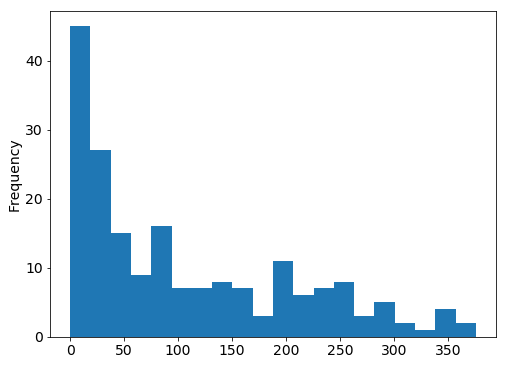

In [10]:
# try more bins
drinks.beer.plot(kind='hist', bins=20)

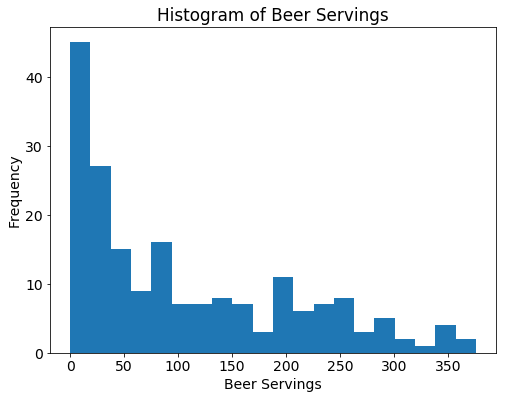

In [11]:
# add title and labels
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

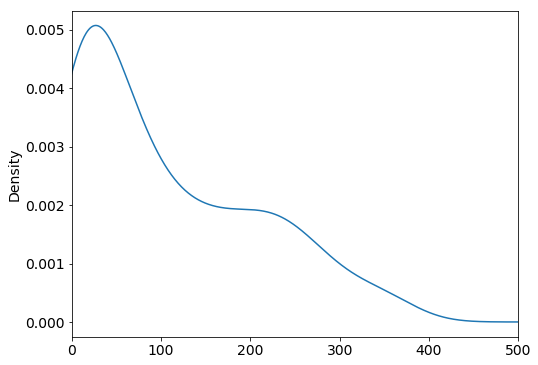

In [12]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

## Scatter Plot: show the relationship between two numerical variables

In [13]:
# select the beer and wine columns and sort by beer
drinks[['beer', 'wine']].sort('beer').values

AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

In [ ]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3)

In [ ]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

In [ ]:
# scatter matrix of three numerical columns
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

In [ ]:
# increase figure size
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8))

## Bar Plot: show a numerical comparison across different categories

In [ ]:
# count the number of countries in each continent
drinks.continent.value_counts()

In [ ]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar')

In [ ]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

In [ ]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

In [ ]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

In [ ]:
# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

## Box Plot: show quartiles (and outliers) for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [ ]:
# sort the spirit column
drinks.spirit.order().values

In [ ]:
# show "five-number summary" for spirit
drinks.spirit.describe()

In [ ]:
# compare with box plot
drinks.spirit.plot(kind='box')

In [ ]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box')

## Line Plot: show the trend of a numerical variable over time

In [ ]:
# read in the ufo data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [ ]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

In [ ]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot()

In [ ]:
# don't use a line plot when there is no logical ordering
drinks.continent.value_counts().plot()

## Grouped Box Plots: show one box plot for each group

In [ ]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box')

In [ ]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

In [ ]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent')

## Grouped Histograms: show one histogram for each group

In [ ]:
# reminder: histogram of beer servings
drinks.beer.plot(kind='hist')

In [ ]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

In [ ]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

In [ ]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

In [ ]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

## Assorted Functionality

In [ ]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

In [ ]:
# list available plot styles
plt.style.available

In [ ]:
# change to a different style
plt.style.use('ggplot')